### Exploring potential relationships between crime rate and low income status, employment status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
toronto = pd.read_csv('wellbeing_toronto.csv')
toronto.describe()

,Neighbourhood Id,Combined Indicators,Total Population,Low Income Families,Low Income Population,Low Income Children (Age 0-17),Drug Arrests,Assaults,Sexual Assaults,Break & Enters,...,Thefts,Murders,Arsons,Fires & Fire Alarms,Fire Vehicle Incidents,Hazardous Incidents,Fire Medical Calls,In Labour Force,Unemployed,Not in Labour Force
count,140.0000,0.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,NaN,19511.221429,2184.642857,4164.785714,1043.214286,20.757143,108.421429,11.035714,45.221429,...,6.957143,0.521429,1.371429,239.385714,84.228571,92.814286,377.592857,9999.928571,934.464286,5541.964286
std,40.5586,NaN,10033.589222,1572.525079,3045.615428,883.396216,26.473516,102.187870,12.221817,31.438891,...,8.673843,1.035123,1.743819,219.257071,78.417472,51.466492,241.024698,5066.518677,531.797785,2966.466341
min,1.0000,NaN,6577.000000,260.000000,470.000000,90.000000,0.000000,9.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,43.000000,6.000000,26.000000,92.000000,3150.000000,215.000000,1735.000000
25%,35.7500,NaN,12019.500000,1080.000000,1865.000000,447.500000,7.000000,47.750000,4.750000,24.000000,...,2.000000,0.000000,0.000000,116.750000,34.000000,60.000000,201.500000,6597.500000,565.000000,3326.250000
50%,70.5000,NaN,16749.500000,1710.000000,3150.000000,740.000000,12.500000,78.000000,8.000000,37.500000,...,4.500000,0.000000,1.000000,186.000000,58.500000,79.500000,309.000000,8602.500000,795.000000,4835.000000
75%,105.2500,NaN,23854.500000,3070.000000,5710.000000,1507.500000,24.000000,133.750000,12.000000,57.000000,...,8.000000,1.000000,2.000000,256.250000,106.000000,118.250000,476.250000,12140.000000,1240.000000,7097.500000
max,140.0000,NaN,65913.000000,10050.000000,15430.000000,4770.000000,174.000000,712.000000,88.000000,213.000000,...,56.000000,6.000000,11.000000,1428.000000,550.000000,347.000000,1454.000000,33045.000000,3310.000000,17755.000000


### Data Prep

In [3]:
toronto.drop(['Combined Indicators','Fires & Fire Alarms','Fire Vehicle Incidents','Hazardous Incidents',
             'Fire Medical Calls'], axis=1, inplace=True)

In [4]:
#toronto.dtypes

Neighbourhood                      object
Neighbourhood Id                  float64
Total Population                  float64
Low Income Families               float64
Low Income Population             float64
Low Income Children (Age 0-17)    float64
Drug Arrests                      float64
Assaults                          float64
Sexual Assaults                   float64
Break & Enters                    float64
Robberies                         float64
Vehicle Thefts                    float64
Thefts                            float64
Murders                           float64
Arsons                            float64
   In Labour Force                float64
   Unemployed                     float64
   Not in Labour Force            float64
dtype: object

In [5]:
# Total crime does not include Fires & Fire Alarms, Fire Vehicle Incidents, Hazardous Incidents, Fire Medical Calls
toronto['TotalCrime'] = toronto['Drug Arrests'] + toronto['Assaults'] + toronto['Sexual Assaults'] \
    + toronto['Break & Enters'] + toronto['Robberies'] + toronto['Vehicle Thefts'] + toronto['Thefts'] \
    + toronto['Murders'] + toronto['Arsons']

In [6]:
# df.rename(columns={'Leader': 'Commander'}, inplace=True)
toronto.rename(columns={'Neighbourhood Id':'ID','Total Population':'TotalPop','Low Income Families':'LIfamilies',
                        'Low Income Population':'LIpop','Low Income Children (Age 0-17)':'LIchildren',
                        'Drug Arrests':'DrugArrests','Sexual Assaults':'SexualAssaults',
                        'Break & Enters':'BreakEnter','Vehicle Thefts':'VehicleThefts',
                        '   In Labour Force':'InLabourForce','   Unemployed':'Unemployed', 
                        '   Not in Labour Force':'NotInLabourForce'}, inplace=True)

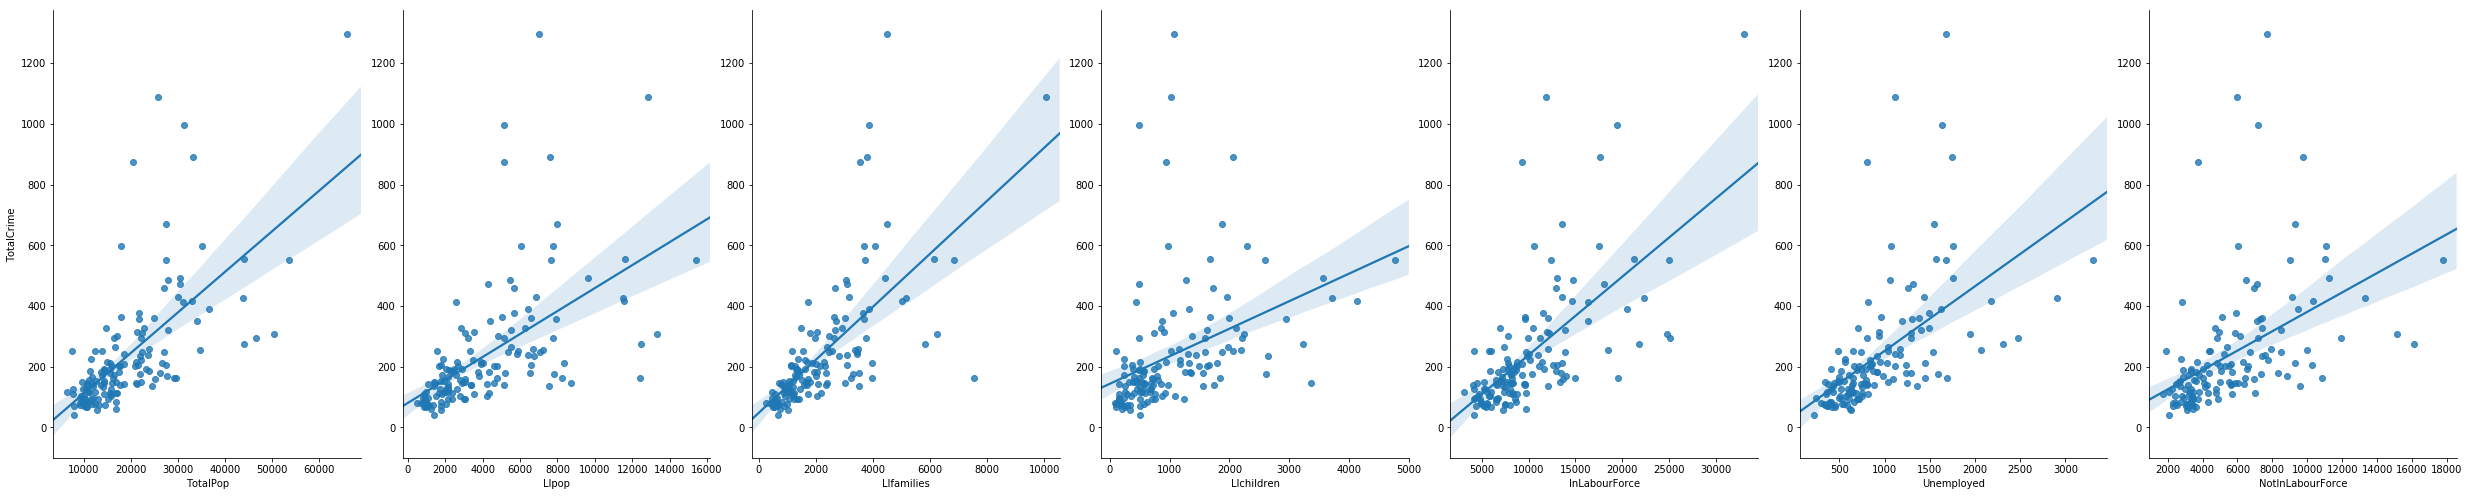

In [7]:
#sns.pairplot(toronto)
#plt.savefig("toronto_pairpolot.png")
#sns.pairplot(data=toronto[['TotalCrime','TotalPop','InLabourForce','Unemployed','NotInLabourForce']])
#plt.savefig("toronto_pairpolot_small.png")

sns.pairplot(toronto, x_vars=['TotalPop','LIpop','LIfamilies','LIchildren'
                              ,'InLabourForce','Unemployed','NotInLabourForce'], y_vars='TotalCrime'
             ,size=7, aspect=0.7, kind='reg')
plt.savefig("totalcrime_pairplot.png")

#### Check for colinearity

In [8]:
df = toronto.iloc[:, [0,2,3,4,5,15,16,17,18]]
df.corr()

,TotalPop,LIfamilies,LIpop,LIchildren,InLabourForce,Unemployed,NotInLabourForce,TotalCrime
TotalPop,1.000000,0.741481,0.762405,0.631516,0.977973,0.871683,0.872612,0.665441
LIfamilies,0.741481,1.000000,0.955608,0.683633,0.686073,0.774305,0.753696,0.681156
LIpop,0.762405,0.955608,1.000000,0.844363,0.679458,0.850272,0.844991,0.571044
LIchildren,0.631516,0.683633,0.844363,1.000000,0.519584,0.831398,0.790266,0.396818
InLabourForce,0.977973,0.686073,0.679458,0.519584,1.000000,0.840781,0.818141,0.647369
Unemployed,0.871683,0.774305,0.850272,0.831398,0.840781,1.000000,0.911419,0.560952
NotInLabourForce,0.872612,0.753696,0.844991,0.790266,0.818141,0.911419,1.000000,0.469951
TotalCrime,0.665441,0.681156,0.571044,0.396818,0.647369,0.560952,0.469951,1.000000


Because of colinearity,
* only LIfamilies, the count of low income families will be used for low income regression analysis
* only InLabourForce, the labour force count will be used for labour analysis

#### Create training andd test sets

In [9]:
both_features = ['LIfamilies','InLabourForce']
X_labour = toronto[['LIfamilies']]
X_lowincome = toronto[['InLabourForce']]
X_labour_LI = toronto[both_features]
y = toronto['TotalCrime']

In [10]:
# Xlb for X labour features
# Xli for X low income features
from sklearn.model_selection import train_test_split
X_lb_train, X_lb_test, y_lb_train, y_lb_test = train_test_split(X_labour, y, random_state=1)
X_li_train, X_li_test, y_li_train, y_li_test = train_test_split(X_lowincome, y, random_state=1)
X_lbli_train, X_lbli_test, y_lbli_train, y_lbli_test = train_test_split(X_labour_LI, y, random_state=1)

### Apply linear regression model from Scikit Learn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg_labour = LinearRegression()
linreg_labour.fit(X_lb_train, y_lb_train)
linreg_lowincome = LinearRegression()
linreg_lowincome.fit(X_li_train, y_li_train)
linreg_lbli = LinearRegression()
linreg_lbli.fit(X_lbli_train, y_lbli_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print("Intercept and coefficients for labour model")
print(linreg_labour.intercept_)
print(linreg_labour.coef_)
print("Intercept and coefficients for low income model")
print(linreg_lowincome.intercept_)
print(linreg_lowincome.coef_)
print("Coefficients for two-feature model")
print(list(zip(both_features, linreg_lbli.coef_)))

Intercept and coefficients for labour model
53.885803721412685
[0.08781354]
Intercept and coefficients for low income model
-45.58502255067444
[0.02925921]
Coefficients for two-feature model
[('LIfamilies', 0.050791981196523076), ('InLabourForce', 0.017840113459453678)]


In [14]:
y_lb_predicted = linreg_labour.predict(X_lb_test)
y_li_predicted = linreg_lowincome.predict(X_li_test)
y_lbli_predicted = linreg_lbli.predict(X_lbli_test)

In [15]:
from sklearn import metrics

In [16]:
print("RMSE for labour model")
print(np.sqrt(metrics.mean_squared_error(y_lb_test, y_lb_predicted)))
print("RMSE for low income model")
print(np.sqrt(metrics.mean_squared_error(y_li_test, y_li_predicted)))
print("RMSE for two-feature model")
print(np.sqrt(metrics.mean_squared_error(y_lbli_test, y_lbli_predicted)))

RMSE for labour model
75.96388508119057
RMSE for low income model
126.43349286233604
RMSE for two-feature model
101.97053032978432


### Use Statsmodel

In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:             TotalCrime   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           2.03e-20
Time:                        20:35:44   Log-Likelihood:                -897.48
No. Observations:                 140   AIC:                             1799.
Df Residuals:                     138   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4490     21.496      2.207      0.0

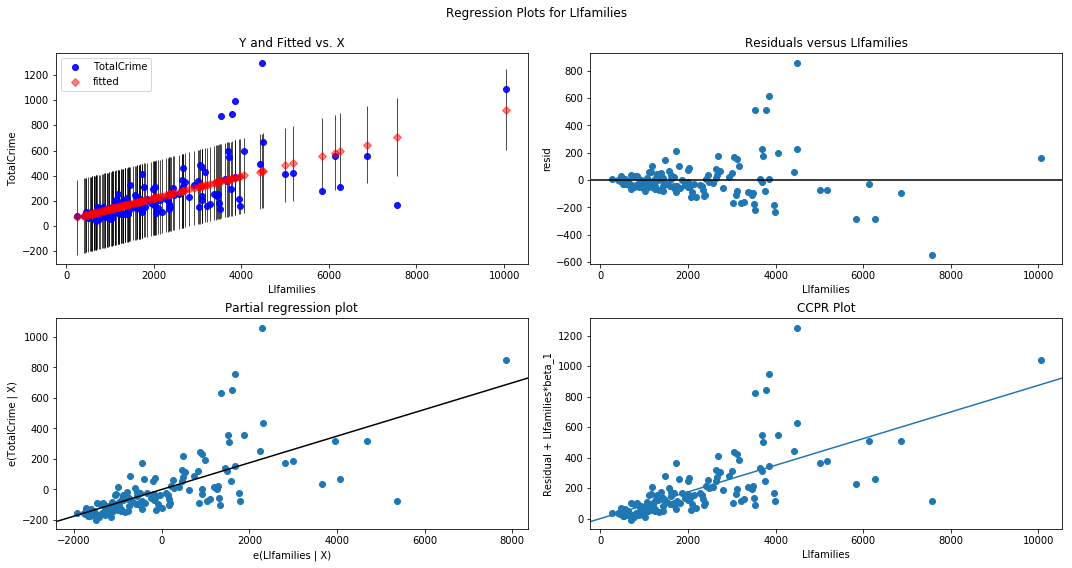

In [18]:
statsmodel_lowincome = ols("TotalCrime ~ LIfamilies", data=toronto).fit()
print(statsmodel_lowincome.summary())

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statsmodel_lowincome, "LIfamilies", fig=fig)

                            OLS Regression Results                            
Dep. Variable:             TotalCrime   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     99.56
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           5.49e-18
Time:                        20:35:45   Log-Likelihood:                -903.11
No. Observations:                 140   AIC:                             1810.
Df Residuals:                     138   BIC:                             1816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -19.4139     28.940     -0.671

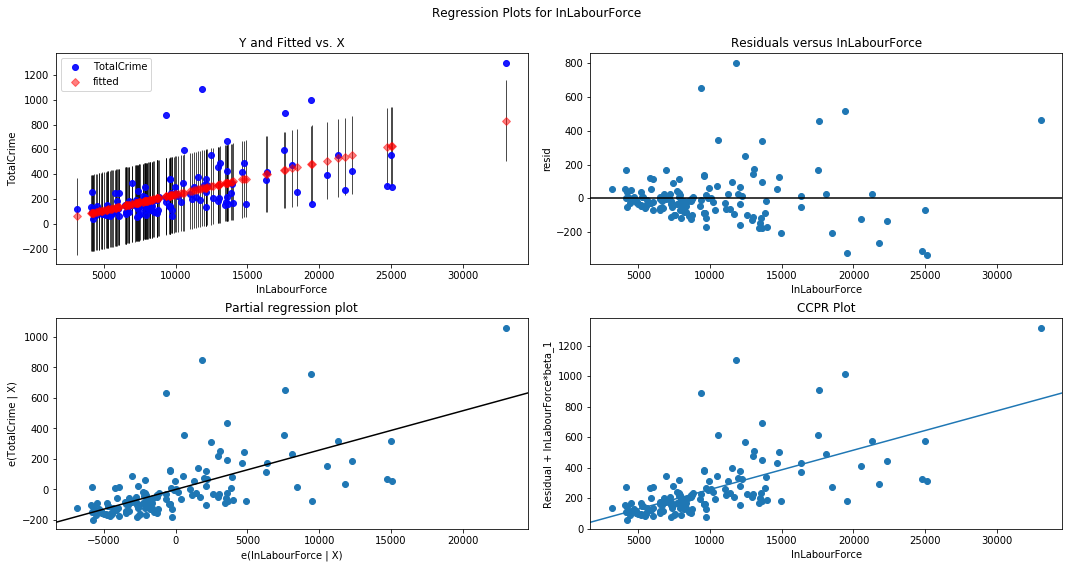

In [19]:
statsmodel_labour = ols("TotalCrime ~ InLabourForce", data=toronto).fit()
print(statsmodel_labour.summary())

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statsmodel_labour, "InLabourForce", fig=fig)

### Redefine variables (in attempt) to fix heteroscedasticity

In [20]:
toronto['ProportionOfLIfamilies'] = toronto['LIfamilies'] / toronto['TotalPop']
toronto['ProportionOfInLabourForce'] = toronto['InLabourForce'] / toronto['TotalPop']
toronto['TotalCrimeRate'] = toronto['TotalCrime'] / toronto['TotalPop']

                            OLS Regression Results                            
Dep. Variable:             TotalCrime   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     20.45
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           1.30e-05
Time:                        20:35:46   Log-Likelihood:                -931.45
No. Observations:                 140   AIC:                             1867.
Df Residuals:                     138   BIC:                             1873.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 91

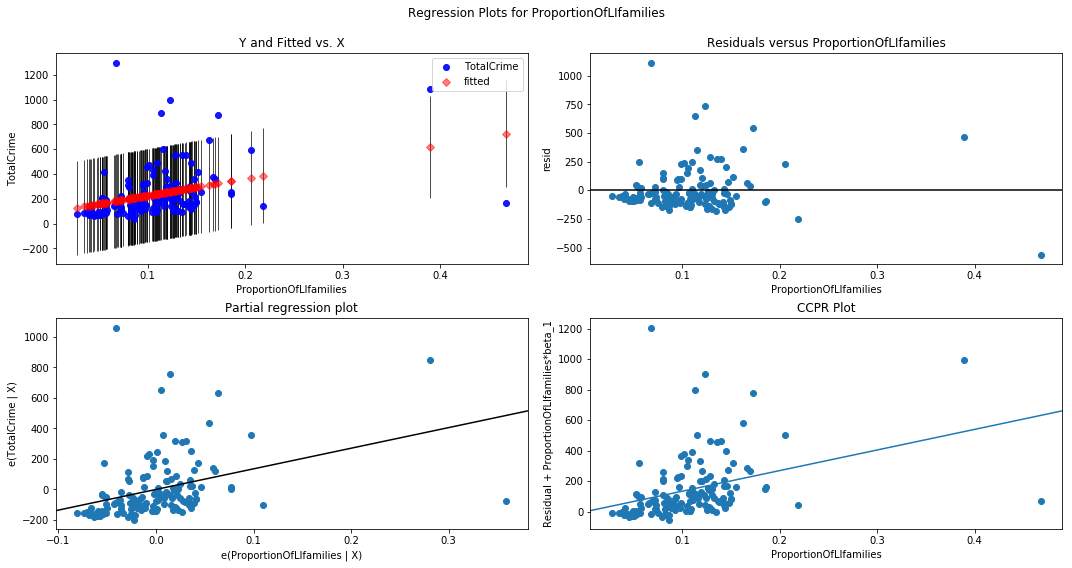

In [21]:
statsmodel_lowincomeRate = ols("TotalCrime ~ ProportionOfLIfamilies", data=toronto).fit()
print(statsmodel_lowincomeRate.summary())

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statsmodel_lowincomeRate, "ProportionOfLIfamilies", fig=fig)

### Review if property crimes can be better estimated than total crime

In [22]:
toronto['TotalPropertyCrime'] = toronto['Robberies'] + toronto['BreakEnter'] + toronto['VehicleThefts'] + toronto['Thefts']
toronto['TotalPropertyCrimeRate'] = toronto['TotalPropertyCrime'] / toronto['TotalPop']

#### By absolute count

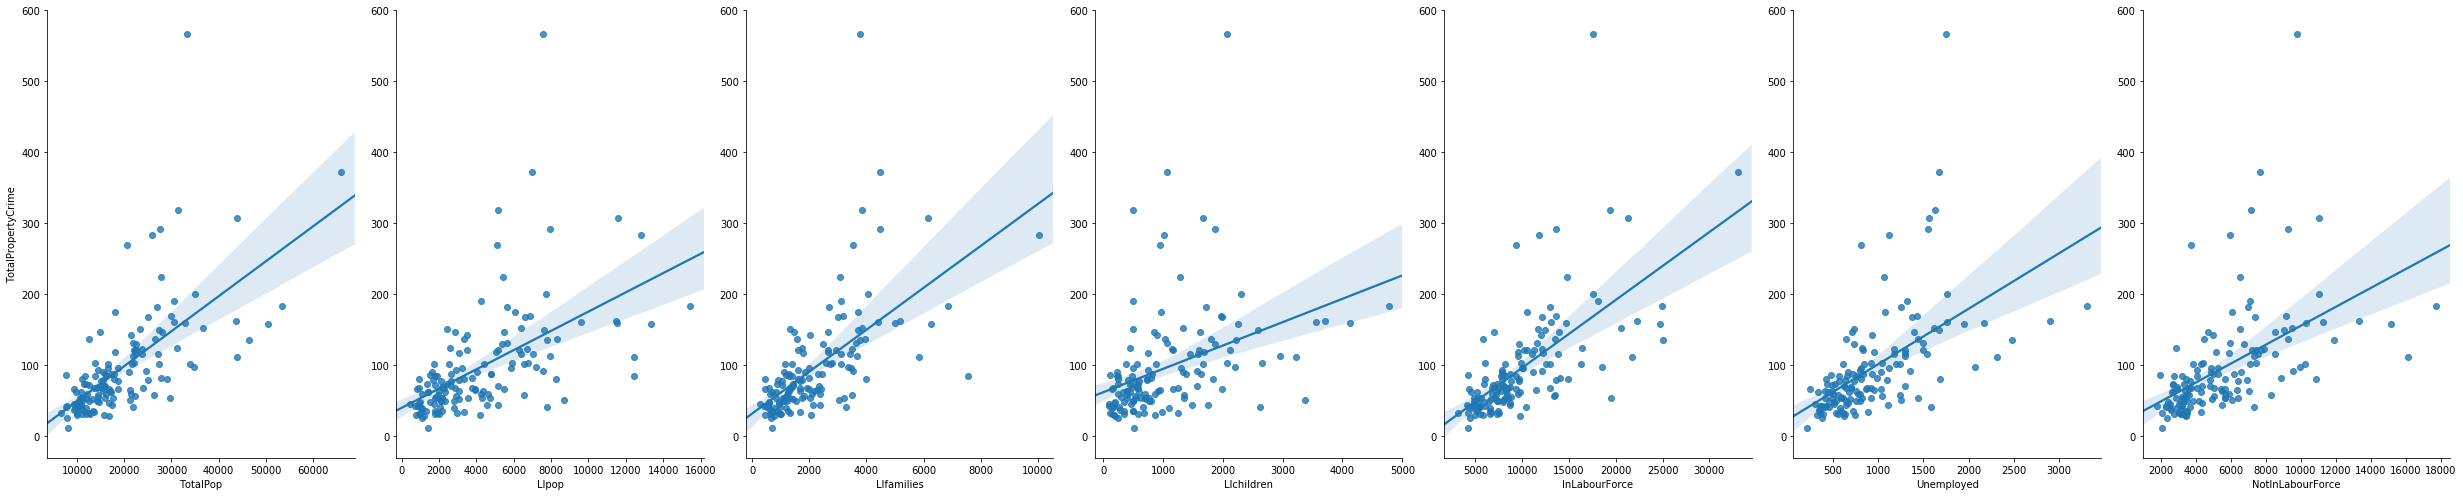

In [23]:
sns.pairplot(toronto, x_vars=['TotalPop','LIpop','LIfamilies','LIchildren','InLabourForce','Unemployed','NotInLabourForce']
             , y_vars=['TotalPropertyCrime']
             , size=7, aspect=0.7, kind='reg')
plt.savefig("property_crime_pairplot.png")

#### By rate (% of population)

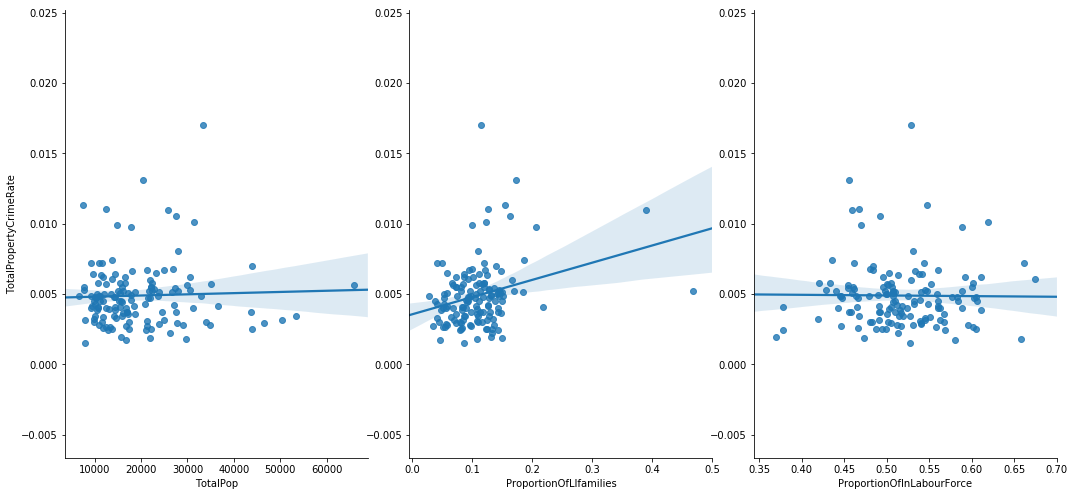

In [24]:
sns.pairplot(toronto, x_vars=['TotalPop','ProportionOfLIfamilies','ProportionOfInLabourForce']
             , y_vars=['TotalPropertyCrimeRate']
             , size=7, aspect=0.7, kind='reg')
plt.savefig("property_crime_rate_pairplot.png")

                            OLS Regression Results                            
Dep. Variable:     TotalPropertyCrime   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           4.79e-18
Time:                        20:35:50   Log-Likelihood:                -763.88
No. Observations:                 140   AIC:                             1532.
Df Residuals:                     138   BIC:                             1538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6731     10.706      0.063

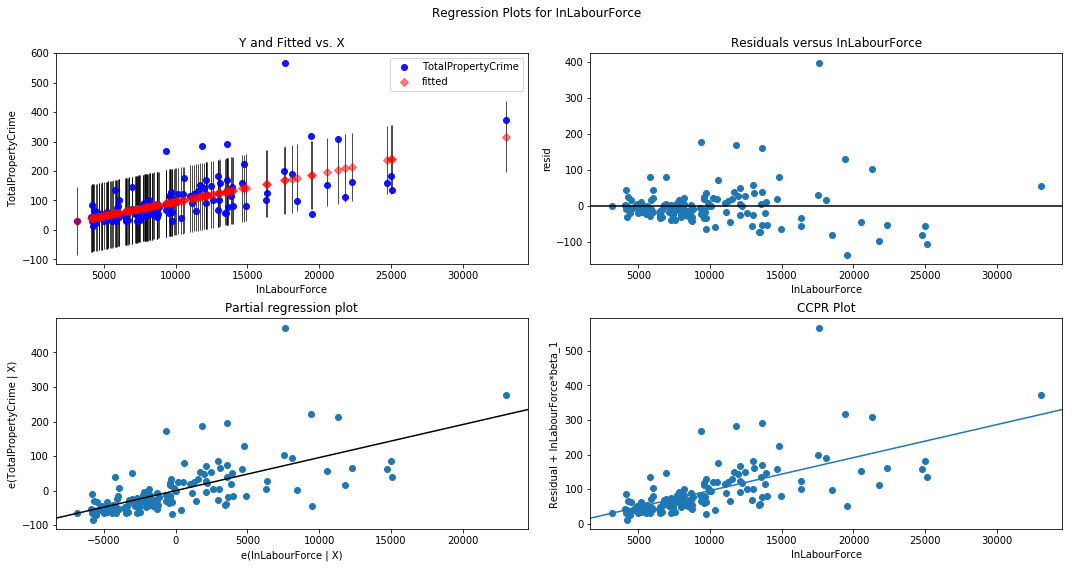

In [25]:
statsmodel_labour = ols("TotalPropertyCrime ~ InLabourForce", data=toronto).fit()
print(statsmodel_labour.summary())

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(statsmodel_labour, "InLabourForce", fig=fig)